***Import necessary library***

In [ ]:
import torchvision
import torch
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

**Want to open the images through Open_CV library**
 **However, imageFolder from touchvision directly access high quality tiff images**

In [ ]:
def opencv_loader(P):
#read image using open CV
    img=cv2.imread(P)
#convert open CV color famework into machine learning famework RGB colour    
    img=cv2.cvtColor(img,cv2.COLOR_BRG2RGB)
    return np.array(img)

**Image transformation from pixel size 2592 * 1944 to 32 * 32 pixcel as well**    **as our array data into tensor**

In [ ]:
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
train_transforms=transforms.Compose([ transforms.RandomHorizontalFlip(),
                                   transforms.RandomRotation(10),
                                   transforms.ToTensor(),
                                   transforms.Normalize(torch.Tensor(mean),torch.Tensor(std)),
                                   transforms.Resize((32,32))])


In [ ]:
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
test_transforms=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize(torch.Tensor(mean),torch.Tensor(std)),
                                    transforms.Resize((32,32)) ])

**Load data into path**

In [ ]:
test_path='/content/drive/MyDrive/Test Stem Cell'
train_path='/content/drive/MyDrive/Train Stem Cell'

**Imagefolder**

In [ ]:

train_datasets=torchvision.datasets.ImageFolder(train_path,transform=train_transforms)

In [ ]:
test_datasets=torchvision.datasets.ImageFolder(test_path,transform=test_transforms)

In [ ]:
len(test_datasets)

56

In [ ]:
len(train_datasets)

340

**Data Loader**

In [ ]:
train_loader=torch.utils.data.DataLoader(train_datasets,batch_size=8,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_datasets,batch_size=2,shuffle=True)

In [ ]:
next(iter(train_loader))

[tensor([[[[-1.0000, -1.0000, -1.0000,  ...,  0.0333,  0.0245, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ...,  0.1549,  0.1451, -1.0000],
           [ 0.1843,  0.1637,  0.1941,  ...,  0.0745,  0.2529, -1.0000],
           ...,
           [-1.0000,  0.3725,  0.2020,  ...,  0.1990,  0.1549,  0.1873],
           [-1.0000,  0.2608,  0.3804,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000,  0.1784,  0.3539,  ..., -1.0000, -1.0000, -1.0000]],
 
          [[-1.0000, -1.0000, -1.0000,  ...,  0.0333,  0.0245, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ...,  0.1549,  0.1451, -1.0000],
           [ 0.1843,  0.1637,  0.1941,  ...,  0.0745,  0.2529, -1.0000],
           ...,
           [-1.0000,  0.3725,  0.2020,  ...,  0.1990,  0.1549,  0.1873],
           [-1.0000,  0.2608,  0.3804,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000,  0.1784,  0.3539,  ..., -1.0000, -1.0000, -1.0000]],
 
          [[-1.0000, -1.0000, -1.0000,  ...,  0.0333,  0.0245, -1.0000],
           [-

In [ ]:
def show_transformed_images(dataset):
    loader=torch.utils.data.DataLoader(dataset,batch_size=4,shuffle=True)
    batch=next(iter(loader))
    images,labels=batch
    grid=torchvision.utils.make_grid(images,nrows=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid,(1,2,0)))
    print('labels:',labels)

**Image_show**

labels: tensor([0, 5, 1, 7])


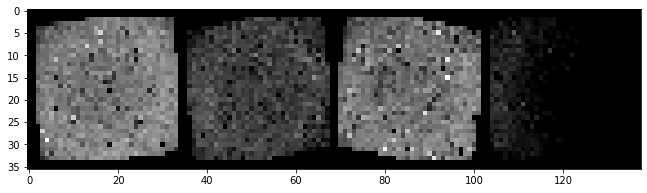

In [ ]:
show_transformed_images(train_datasets)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

**Model_Archicture**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1, padding=1)
        self.fc1=nn.Linear(64*8*8,128)
        self.fc2=nn.Linear(128,84)
        self.fc3=nn.Linear(84,8)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x = x.flatten(1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        #x = F.relu(nn.Linear(x.size(1),8))
        #x = F.relu(nn.Linear(128, 84))
        #x = F.relu(nn.Linear(84, 8))
        return x
    
   
model=Net()

In [ ]:
t = torch.randn(1,2,3,4)
t = t.flatten(1)
t.size(1)

24

In [ ]:
import torch.optim as optim

**Define a Loss function and optimizer**

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [ ]:
inputs, labels = next(iter(train_loader))

In [ ]:
inputs, labels = next(iter(train_loader))
optimizer.zero_grad()
pred_output = model(inputs)
loss=criterion(pred_output,labels)
loss.backward()
optimizer.step()

**Train the network**

In [ ]:
num_epoch=100
for epoch in range(num_epoch):
    running_loss=0.0
    for i, data in enumerate(train_loader,0):
        #get input and label
        inputs,labels=data
        #zero the parameter gradients
        optimizer.zero_grad()
        #forwaed+backward+optimizer
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        #print statistics
        running_loss +=loss.item()
        if i%10==9:
            print('[%d,%5d] loss:%.3f'% (epoch+1,i+1,running_loss/10))
            running_loss=0.0
            
print('finished Traning')    

[1,   10] loss:2.086
[1,   20] loss:2.071
[1,   30] loss:2.081
[1,   40] loss:2.083
[2,   10] loss:2.084
[2,   20] loss:2.073
[2,   30] loss:2.075
[2,   40] loss:2.073
[3,   10] loss:2.078
[3,   20] loss:2.066
[3,   30] loss:2.072
[3,   40] loss:2.082
[4,   10] loss:2.068
[4,   20] loss:2.067
[4,   30] loss:2.083
[4,   40] loss:2.062
[5,   10] loss:2.068
[5,   20] loss:2.072
[5,   30] loss:2.066
[5,   40] loss:2.065
[6,   10] loss:2.067
[6,   20] loss:2.061
[6,   30] loss:2.055
[6,   40] loss:2.067
[7,   10] loss:2.062
[7,   20] loss:2.052
[7,   30] loss:2.056
[7,   40] loss:2.051
[8,   10] loss:2.047
[8,   20] loss:2.042
[8,   30] loss:2.049
[8,   40] loss:2.037
[9,   10] loss:2.040
[9,   20] loss:2.027
[9,   30] loss:2.024
[9,   40] loss:2.035
[10,   10] loss:2.029
[10,   20] loss:2.003
[10,   30] loss:2.011
[10,   40] loss:2.007
[11,   10] loss:1.986
[11,   20] loss:1.975
[11,   30] loss:1.983
[11,   40] loss:2.011
[12,   10] loss:1.999
[12,   20] loss:2.005
[12,   30] loss:1.950
[1

**Save the model**

In [ ]:
torch.save(model, 'model.pth')

In [ ]:
model = torch.load('model.pth')

In [ ]:
model.eval()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
)

**Prediction**

In [ ]:
for data in test_loader:
    test_images, test_labels =data
    predictions = model(test_images)
    print(predictions)

tensor([[ 0.6791,  4.7237, -2.1716, -1.4151, -4.4084,  3.9255, -5.7315,  4.5113],
        [-4.0802,  3.1930, -1.7390, -1.0444, -3.9580,  2.8684,  1.2963,  3.6093]],
       grad_fn=<AddmmBackward0>)
tensor([[ 2.7721,  2.3247, -1.4148,  1.1009, -0.3712, -2.3335, -1.1605, -1.1644],
        [ 0.6285,  0.3042, -2.6103,  1.4211, -1.3893, -0.8298,  3.1470,  0.7037]],
       grad_fn=<AddmmBackward0>)
tensor([[-4.5460, -0.8390,  2.8055, -1.5740,  0.7924,  3.1374, -1.1882,  2.4090],
        [-4.1059, -0.4724,  1.3100, -2.5435,  0.4394,  1.6403,  2.8034,  3.3051]],
       grad_fn=<AddmmBackward0>)
tensor([[-4.5631, -0.3069,  2.3071, -2.0732,  0.3921,  2.7060, -0.0246,  2.7547],
        [ 2.8487,  3.3348, -0.0626, -0.5760,  0.7158, -2.2565, -3.7018, -0.3968]],
       grad_fn=<AddmmBackward0>)
tensor([[-3.2183,  1.2966, -0.8683,  0.5188, -3.0288,  1.6789,  0.4069,  2.8606],
        [ 2.3970,  2.8557, -2.1502,  0.8097, -2.1860, -0.4682, -1.9218,  0.1522]],
       grad_fn=<AddmmBackward0>)
tensor([[ 

In [ ]:
test_labels

tensor([0, 6])

In [ ]:
predictions = model(test_images)
predictions

tensor([[ 2.3941,  2.5931, -2.5991,  1.3705, -2.5331, -0.6208, -1.0977, -0.0868],
        [-2.1542, -1.1880, -0.1875, -1.4069,  1.0694, -0.1397,  4.5655,  2.2295]],
       grad_fn=<AddmmBackward0>)

**Test the network on the test data. and providing accuracy is on the way**

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 50 %
